In [49]:
pip install pandas matplotlib seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [51]:
import sqlite3

# Conecta ao banco de dados
conn = sqlite3.connect("chinook.db")

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Estilo padrão do seaborn
sns.set(style="whitegrid")

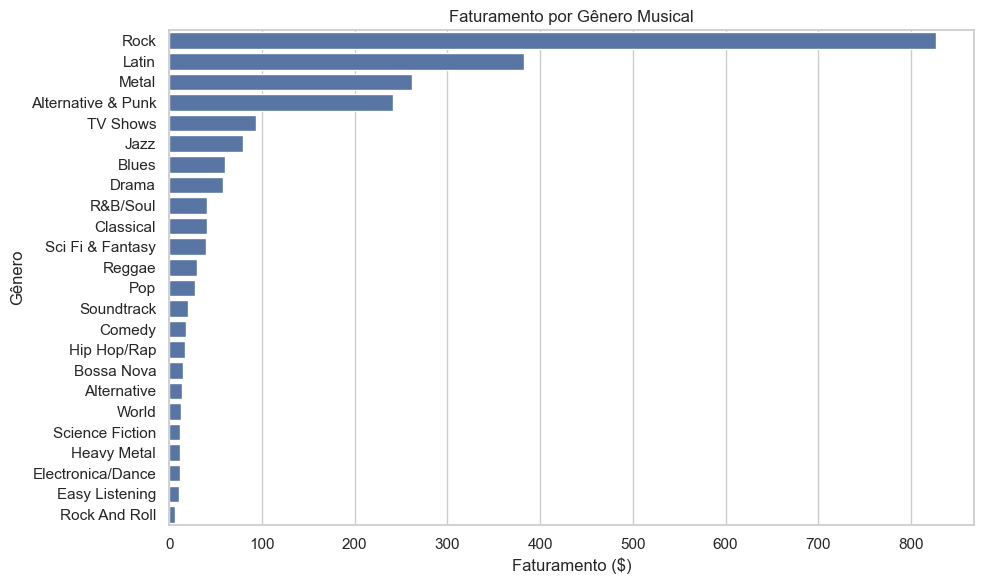

In [55]:
# Faturamento por Gênero Musical (Gráfico de Barras)
df_genre = pd.read_sql_query("""
    SELECT g.Name AS Genre, SUM(ii.UnitPrice * ii.Quantity) AS Revenue
    FROM invoice_items ii
    JOIN tracks t ON ii.TrackId = t.TrackId
    JOIN genres g ON t.GenreId = g.GenreId
    GROUP BY g.Name
    ORDER BY Revenue DESC
""", conn)

plt.figure(figsize=(10,6))
sns.barplot(x='Revenue', y='Genre', data=df_genre)
plt.title('Faturamento por Gênero Musical')
plt.xlabel('Faturamento ($)')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()


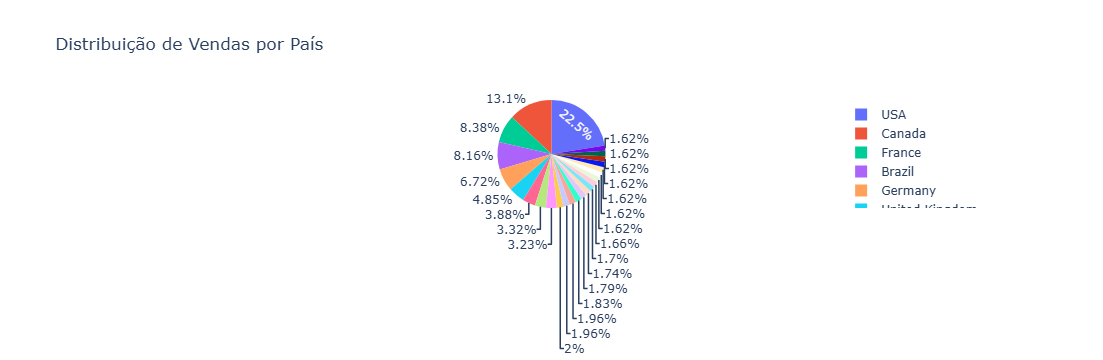

In [57]:
# Vendas por País (Gráfico de Pizza)

df_country = pd.read_sql_query("""
    SELECT BillingCountry AS Country, SUM(Total) AS Revenue
    FROM Invoices
    GROUP BY BillingCountry
""", conn)

fig = px.pie(df_country, names='Country', values='Revenue', title='Distribuição de Vendas por País')
fig.show()


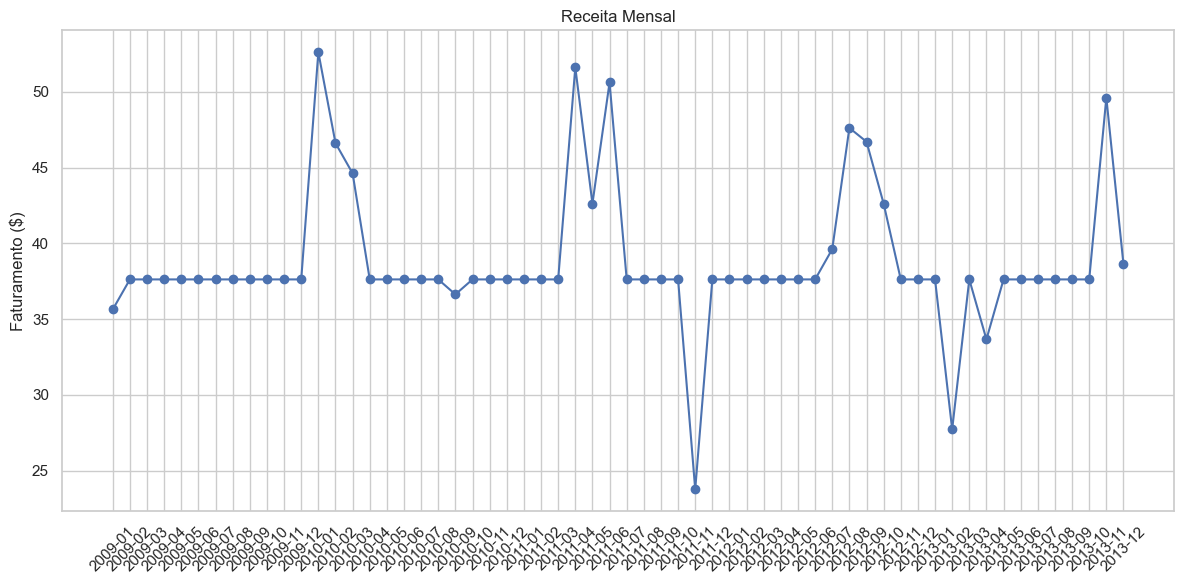

In [59]:
# Receita Mensal (Gráfico de Linha)

df_time = pd.read_sql_query("""
    SELECT strftime('%Y-%m', InvoiceDate) AS Month, SUM(Total) AS Revenue
    FROM Invoices
    GROUP BY Month
""", conn)

plt.figure(figsize=(12,6))
plt.plot(df_time['Month'], df_time['Revenue'], marker='o')
plt.title('Receita Mensal')
plt.xticks(rotation=45)
plt.ylabel('Faturamento ($)')
plt.tight_layout()
plt.show()

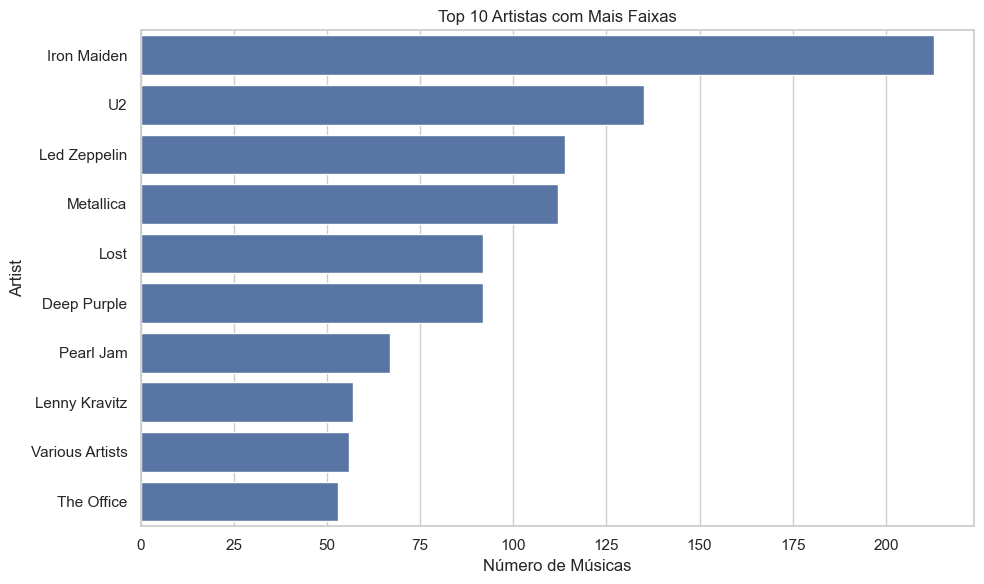

In [61]:
# Artistas com Mais Faixas (Barra Horizontal)

df_artists = pd.read_sql_query("""
    SELECT ar.Name AS Artist, COUNT(t.TrackId) AS Tracks
    FROM artists ar
    JOIN albums al ON ar.ArtistId = al.ArtistId
    JOIN tracks t ON al.AlbumId = t.AlbumId
    GROUP BY ar.Name
    ORDER BY Tracks DESC
    LIMIT 10
""", conn)

plt.figure(figsize=(10,6))
sns.barplot(x='Tracks', y='Artist', data=df_artists)
plt.title('Top 10 Artistas com Mais Faixas')
plt.xlabel('Número de Músicas')
plt.tight_layout()
plt.show()


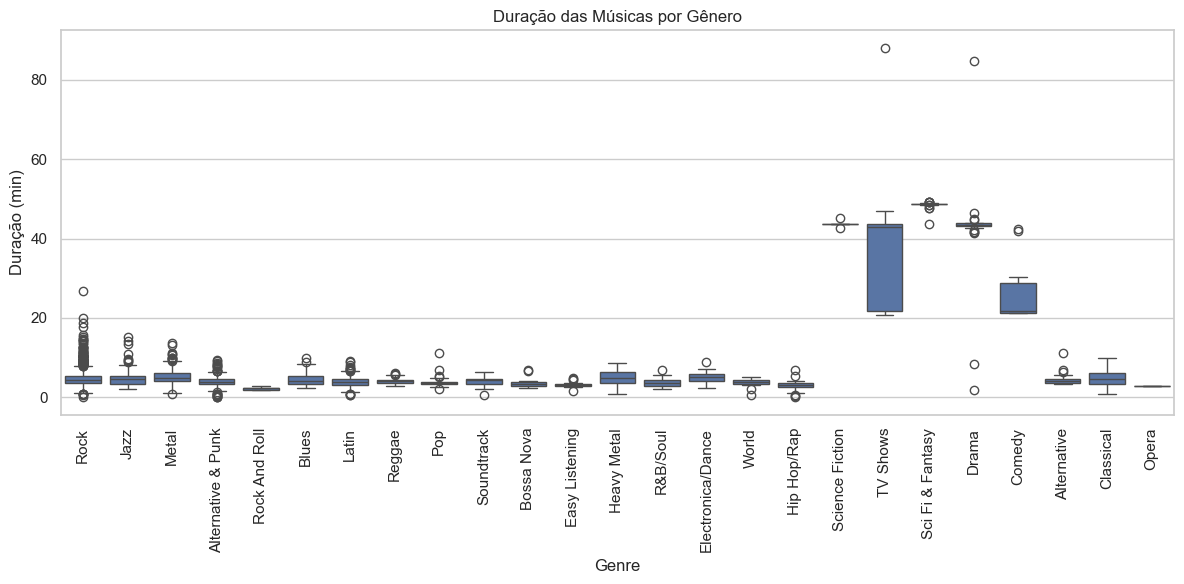

In [63]:
# Duração das Músicas por Gênero (Boxplot)

df_duration = pd.read_sql_query("""
    SELECT g.Name AS Genre, t.Milliseconds/60000.0 AS Duration
    FROM Tracks t
    JOIN Genres g ON t.GenreId = g.GenreId
""", conn)

plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='Duration', data=df_duration)
plt.title('Duração das Músicas por Gênero')
plt.xticks(rotation=90)
plt.ylabel('Duração (min)')
plt.tight_layout()
plt.show()


In [65]:
# Insight 1 - Faturamento por Gênero Musical:
# Gêneros como Rock e Latin apresentam o maior faturamento. Isso sugere que campanhas promocionais e novos contratos
# podem ser direcionados aos gêneros mais lucrativos, maximizando retorno financeiro.

# Insight 2 - Distribuição de Vendas por País:
# Os países com maior participação no faturamento indicam onde a base de clientes é mais forte.
# Estratégias de marketing, como lançamentos e pacotes promocionais, podem ser priorizadas nessas regiões.

# Insight 3 - Receita Mensal ao Longo do Tempo:
# Identifica sazonalidade nas vendas. Meses com baixa receita podem ser alvo de promoções específicas,
# enquanto meses com alta demanda podem ser usados para lançar novos produtos.

# Insight 4 - Artistas com Maior Número de Músicas:
# Artistas mais produtivos possuem maior relevância no catálogo. O gerente pode focar em manter bons relacionamentos com
# esses artistas e avaliar novas parcerias com base em produtividade.

# Insight 5 - Duração Média das Músicas por Gênero:
# Alguns gêneros têm músicas mais curtas, outros mais longas. Isso pode influenciar na montagem de playlists personalizadas
# para públicos distintos, maximizando engajamento e satisfação do usuário.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Housing.csv')
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [69]:
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

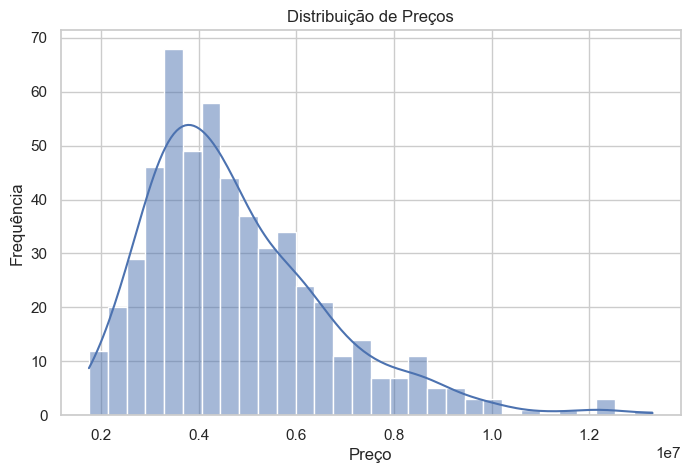

In [71]:
# Histograma de preços

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribuição de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

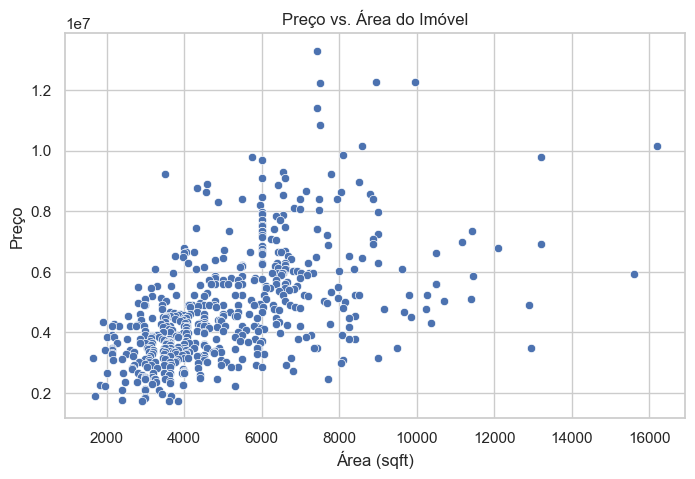

In [73]:
#  Dispersão preço × área

plt.figure(figsize=(8,5))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Preço vs. Área do Imóvel')
plt.xlabel('Área (sqft)')
plt.ylabel('Preço')
plt.show()

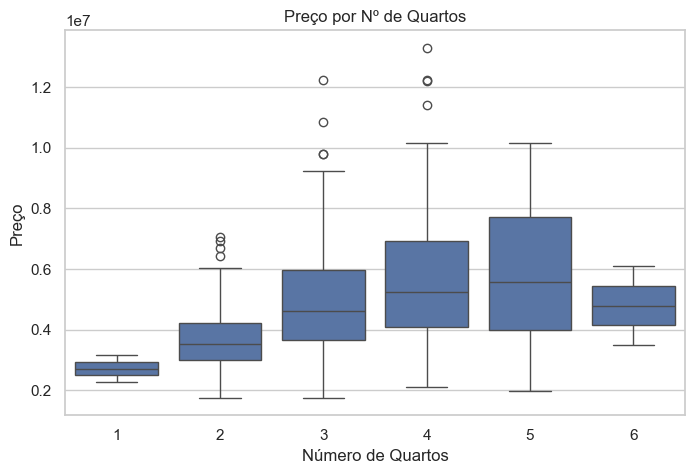

In [75]:
# Boxplot de preço por número de quartos

plt.figure(figsize=(8,5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Preço por Nº de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço')
plt.show()

In [78]:
# Insight 1 - Distribuição de Preços (Histograma):
# A maioria dos imóveis está concentrada em uma faixa de preço mais acessível, com poucos imóveis de alto valor.
# Isso ajuda a definir o público-alvo e os tipos de imóveis a destacar em anúncios.

# Insight 2 - Preço vs. Área (Gráfico de Dispersão):
# Existe uma relação clara entre o aumento da área do imóvel e o preço. Também é possível visualizar outliers,
# como imóveis grandes com preço baixo — ótimas oportunidades para campanhas ou renegociação.

# Insight 3 - Preço por Número de Quartos (Boxplot):
# Imóveis com mais quartos tendem a ter preço mais alto, mas há sobreposição de faixas.
# Isso permite avaliar se vale a pena investir em imóveis com mais quartos ou se imóveis com 2 ou 3 quartos entregam melhor custo-benefício.